### 數據集特徵整理

age(年齡) - Age of the patient 

sex(性別) - Sex of the patient (0-Female, 1-Male)

cp(胸痛類型) - Chest pain type ~ 0 = Typical Angina, 1 = Atypical Angina, 2 = Non-anginal Pain, 3 = Asymptomatic 

trtbps (靜息血壓) - Resting blood pressure (in mm Hg)

chol(膽固醇值) - Cholestoral in mg/dl fetched via BMI sensor 

fbs(空腹血糖) - (fasting blood sugar > 120 mg/dl) ~ 1 = True, 0 = False 

restecg(靜息心電圖) - Resting electrocardiographic results ~ 0 = Normal, 1 = ST-T wave normality, 2 = Left ventricular hypertrophy 

thalachh (最大心率) - Maximum heart rate achieved

exng (運動誘發的心絞痛)- Exercise induced angina ~ 1 = Yes, 0 = No 

oldpeak (之前的高峰)- Previous peak 

slp (斜率)- Slope

caa (血管數量)- Number of major vessels 

thall(鋇壓力測試結果) - Thalium Stress Test result ~ (0,3) 

output (心臟病) - target : 0= less chance of heart attack 1= more chance of heart attack

### Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [5]:
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report, confusion_matrix

In [6]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

### Load data

In [7]:
heart_data = pd.read_csv('C:\\Users\\Tiffany\\Desktop\\國泰作業\\dstest2023\\heart.csv')

In [8]:
heart_data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [9]:
heart_data.shape

(303, 14)

### 初步數據清理 確認格式正確

In [10]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


- 確認有無缺失值 (No missing values)

In [11]:
heart_data.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

### Exploratory Data Analysis 探索性資料分析

- Summary statistics 統計數據

In [12]:
pd.set_option('display.float_format', '{:.2f}'.format)
heart_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,303.00,54.37,9.08,29.00,47.50,55.00,61.00,77.00
sex,303.00,0.68,0.47,0.00,0.00,1.00,1.00,1.00
cp,303.00,0.97,1.03,0.00,0.00,1.00,2.00,3.00
trtbps,303.00,131.62,17.54,94.00,120.00,130.00,140.00,200.00
chol,303.00,246.26,51.83,126.00,211.00,240.00,274.50,564.00
fbs,303.00,0.15,0.36,0.00,0.00,0.00,0.00,1.00
restecg,303.00,0.53,0.53,0.00,0.00,1.00,1.00,2.00
thalachh,303.00,149.65,22.91,71.00,133.50,153.00,166.00,202.00
exng,303.00,0.33,0.47,0.00,0.00,0.00,1.00,1.00
oldpeak,303.00,1.04,1.16,0.00,0.00,0.80,1.60,6.20


- 從統計數據可以看出:

    - 是否得心臟病：平均的罹病率為54%
    - 年齡分佈：平均年齡54歲，最小29歲，最大77歲
    - 性別分布: 68% 病患為男性

    其他數值的分布狀態:
    - trtbps (靜息血壓) 平均 132 mm Hg
    - chol (膽固醇值) 平均 246
    - thalachh (最大心率) 平均 150

- 區分 continuous_data and categorical_data 方便 EDA 展示

In [13]:
heart_data.nunique()

age          41
sex           2
cp            4
trtbps       49
chol        152
fbs           2
restecg       3
thalachh     91
exng          2
oldpeak      40
slp           3
caa           5
thall         4
output        2
dtype: int64

In [14]:
continuous_data = ['age','trtbps','chol','thalachh','oldpeak']
categorical_data = ['sex','cp','fbs','restecg','exng','slp','caa','thall','output']

- 了解 continuous_data 分布狀態

    圖中可看出:
    
    - 年齡分佈主要落在 40-70 歲之間
    
    - trtbps (靜息血壓)主要落在 120-140
    
    - chol(膽固醇值)主要落在 200-300
    
    - thalachh (最大心率)主要落在 140-180
    
    - oldpeak (之前的高峰)主要落在 0-1

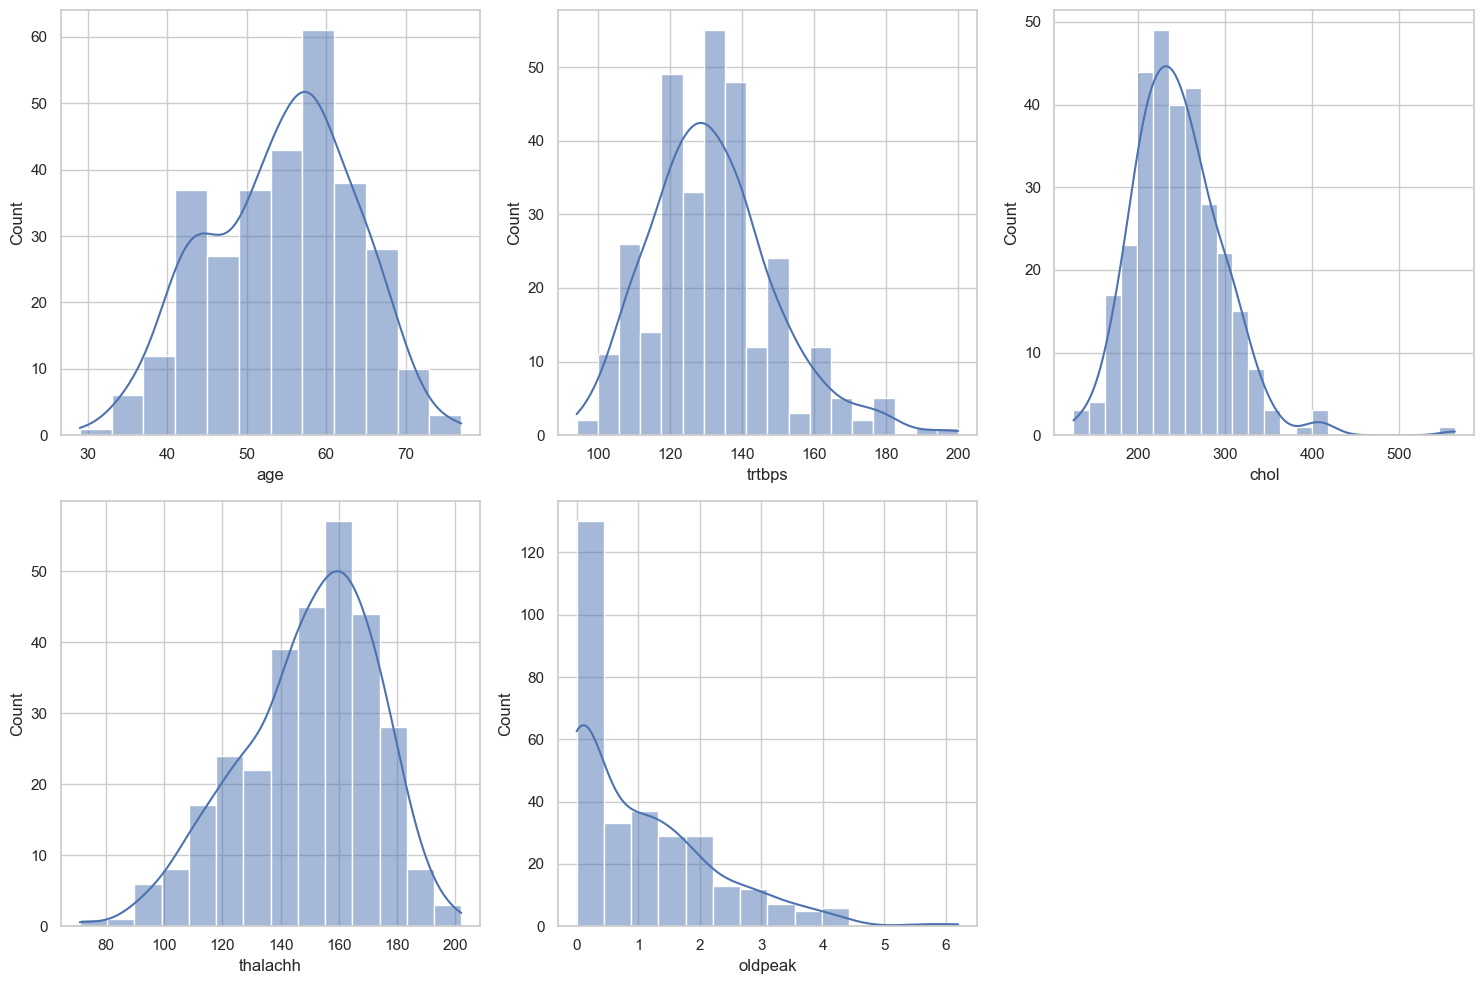

In [15]:
sns.set(style="whitegrid")
plt.figure(figsize=(15, 10))
for index, continuous in enumerate(continuous_data):
    plt.subplot(2,3,index+1) #'index + 1'參數指定當前子圖在網格中的位置
    sns.histplot(x=continuous, data=heart_data, kde=True)
plt.tight_layout()

- 搭配 Target variable (output) 了解 continuous_data 分布狀態

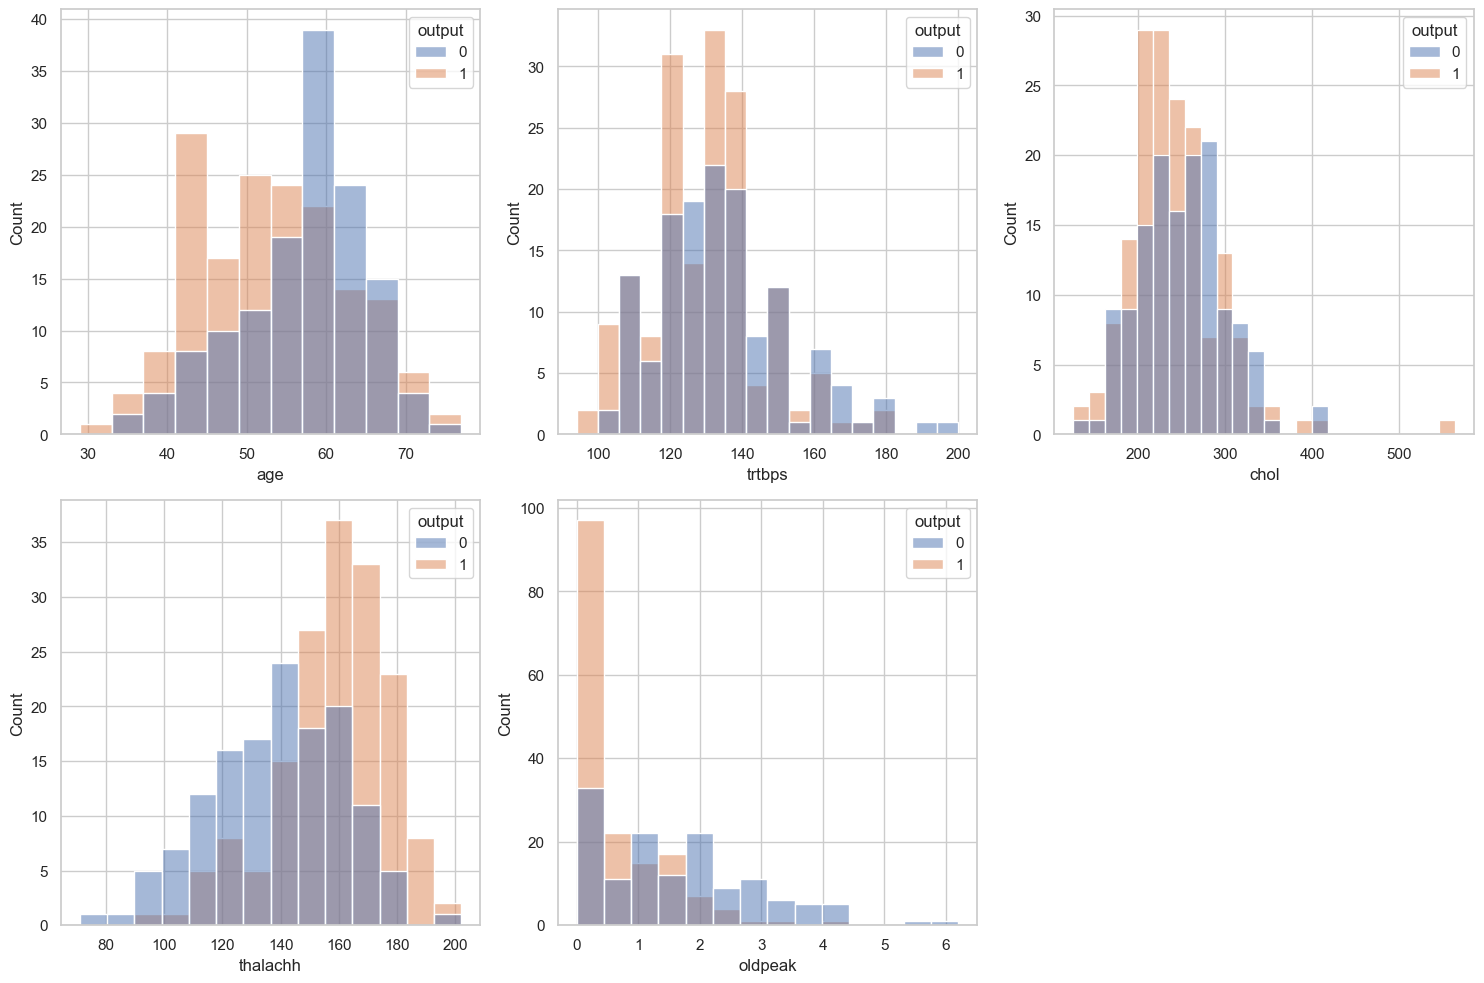

In [16]:
sns.set(style="whitegrid")
plt.figure(figsize=(15, 10))
for index, continuous in enumerate(continuous_data):
    plt.subplot(2,3,index+1) 
    sns.histplot(x=continuous, data=heart_data, hue='output')
plt.tight_layout()

- 運用 boxplot 了解 continuous_data 數據分布的統計資訊

    圖中可看出特徵數據的中位數, 四分位數與異常值

    "異常值" 會在資料預處理時進行處理

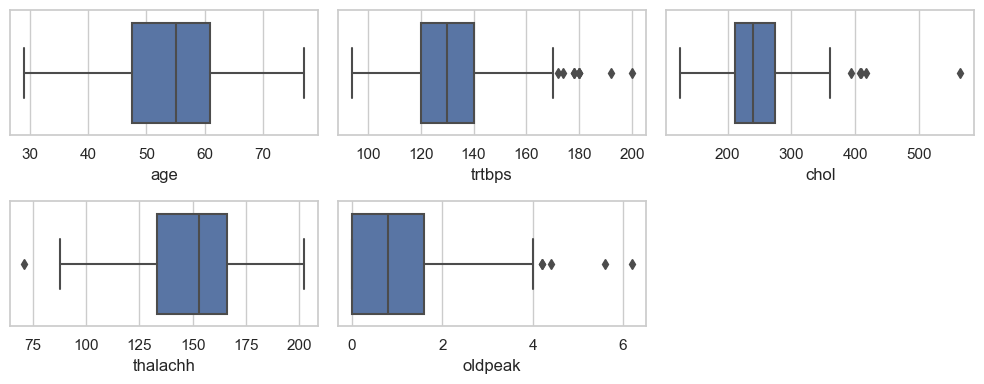

In [17]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 4))
for index, continuous in enumerate(continuous_data):
    plt.subplot(2,3,index+1)
    sns.boxplot(x=continuous, data=heart_data)
plt.tight_layout()

- 運用 bar charts 了解 categorical_data 分布狀態

    圖中可看出:
    
    - Sex - 男性 (1) 病患數量明顯高於女性 (0)
    - cp (胸痛類型) - 0 = Typical Angina, 2 = Non-anginal Pain 佔較多數
    - fbs (空腹血糖) - 大部分病患的 fbs 並無 (> 120 mg/dl) 
    - restecg (靜息心電圖) - 多數病患結果為 0 = Normal, 1 = ST-T wave normality
    - exng (運動誘發的心絞痛) - 沒有此症狀的患者佔多數 
    - output (心臟病) - 心臟病發作機率較高 (1) 的數量稍多於機率較低 (0) 的數量
          ，兩個類別數看起來相對平衡 -> 可以幫助模型學習並區分兩個類別

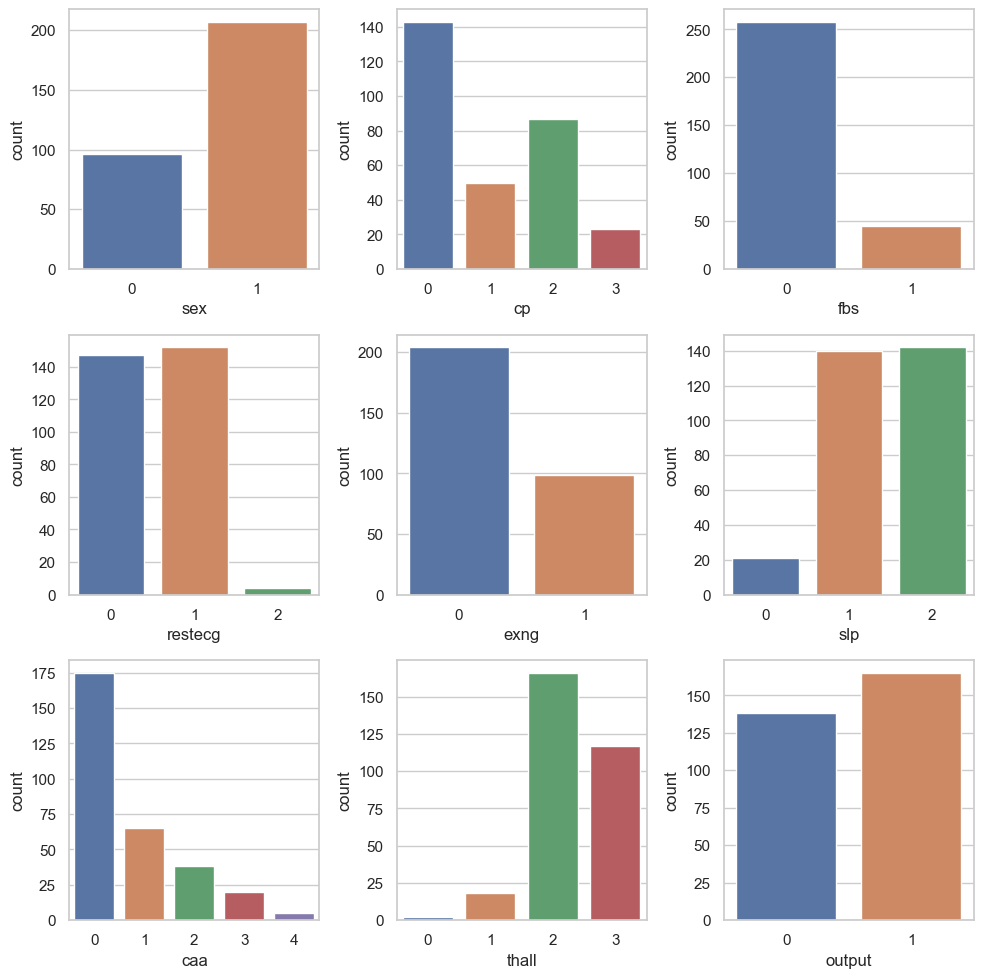

In [18]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 10))
for index, category in enumerate(categorical_data):
    plt.subplot(3,3,index+1) 
    sns.countplot(x=category, data=heart_data)
plt.tight_layout()

- 運用 Correlation matrix 了解連續特徵與目標變數之間的相關性

    單看特徵與特徵之間:
    如果相關係數大於 0.7 或小於 -0.7，表示存在顯著的共線性
    
    由圖可看出:
    - 連續變量間 -> 沒有顯著的共線性問題
    - output 和其他特徵之間的相關性 -> 作為特徵選擇的依據與參考

Text(0.5, 1.0, 'Correlation matrix between continuous data and target variable')

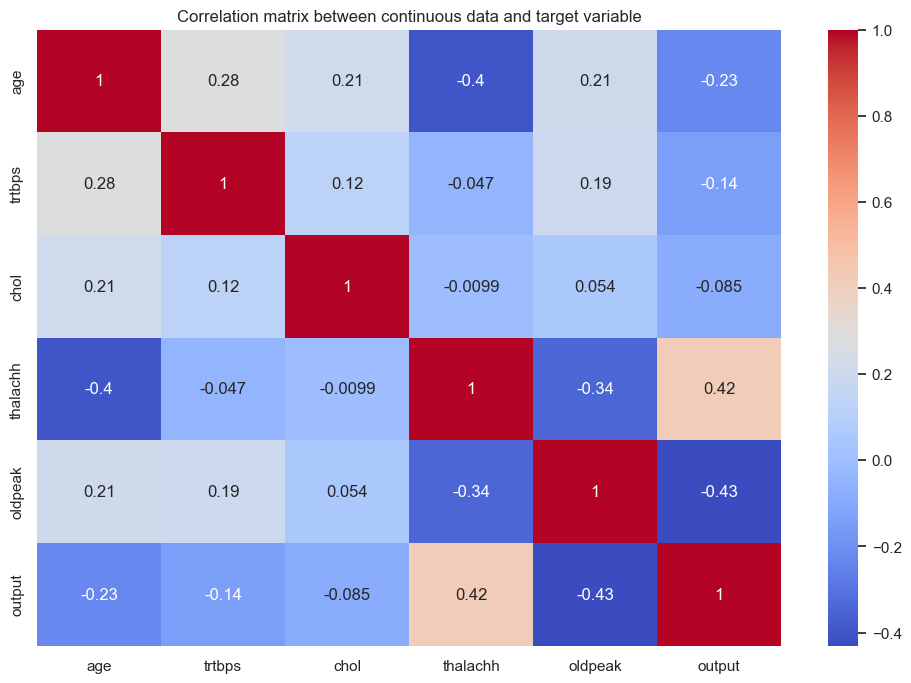

In [19]:
con_with_target = continuous_data + ['output']

plt.figure(figsize=(12, 8))
tar_corr_con_data = heart_data[con_with_target].corr()
sns.heatmap(data=tar_corr_con_data, cmap='coolwarm', annot=True)
plt.title('Correlation matrix between continuous data and target variable')

### Data Preprocessing 資料預處理

1. 處理缺失值 

2. 處理異常值 (outliers)

3. Categorical string 轉換成 numerical variables (One-hot encoding) 

1. 處理缺失值 
-> 此 data set 沒有 null values

2. 處理異常值 (outliers)

    使用 IQR（四分位範圍）來識別 outliers，並對 continuous data 進行異常值處理

In [20]:
heart_data[continuous_data].head()

,age,trtbps,chol,thalachh,oldpeak
0,63,145,233,150,2.30
1,37,130,250,187,3.50
2,41,130,204,172,1.40
3,56,120,236,178,0.80
4,57,120,354,163,0.60


<Axes: xlabel='trtbps'>

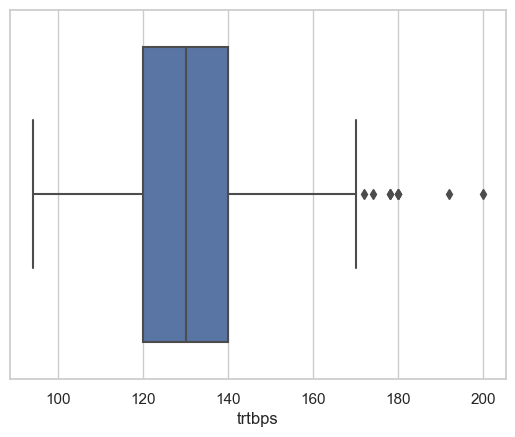

In [21]:
sns.boxplot(x='trtbps', data=heart_data)

In [22]:
# #test 1 feature - trtbps

# Q1=heart_data['trtbps'].quantile(0.25)
# Q3=heart_data['trtbps'].quantile(0.75)
# IQR=Q3-Q1
# outliers=((heart_data['trtbps'] < (Q1 - 1.5 * IQR)) | (heart_data['trtbps'] > (Q3 + 1.5 * IQR)))
# outliers
# heart_data[outliers==True]

In [23]:
for feature in continuous_data:
    Q1=heart_data[feature].quantile(0.25)
    Q3=heart_data[feature].quantile(0.75)
    IQR=Q3-Q1
    
    outliers=((heart_data[feature] < (Q1 - 1.5 * IQR)) | (heart_data[feature] > (Q3 + 1.5 * IQR)))
    heart_data = heart_data[outliers==False]

- 處理完 outliers，透過 boxplot 視覺化進行檢查

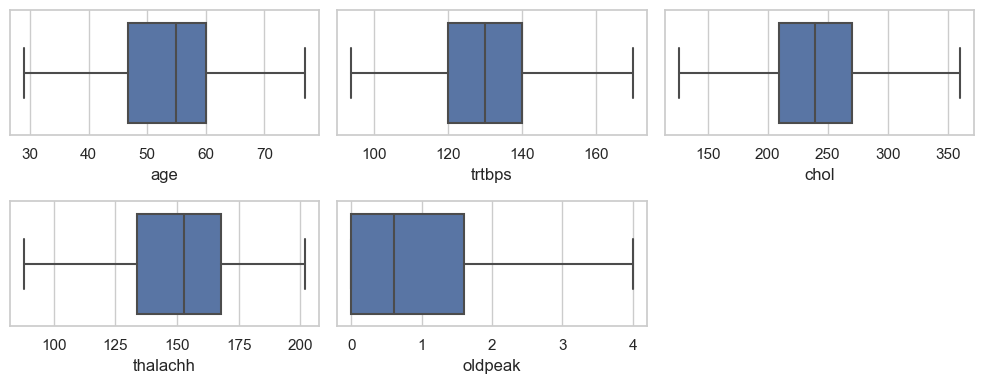

In [24]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 4))
for index, continuous in enumerate(continuous_data):
    plt.subplot(2,3,index+1)
    sns.boxplot(x=continuous, data=heart_data)
plt.tight_layout()

3. Categorical string 轉換成 numerical variables (One-hot encoding) 

- One-hot encoding 前的資料維度

In [25]:
heart_data.shape

(284, 14)

In [26]:
heart_data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.30,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.50,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.40,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.80,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.60,2,0,2,1


- 針對 categoriacal data 進行 One-hot encoding 處理

In [27]:
heart_data = pd.get_dummies(heart_data, columns=['sex', 'cp', 'fbs', 'restecg', 'exng',
                                    'slp', 'caa', 'thall'],drop_first=True)
heart_data.columns

Index(['age', 'trtbps', 'chol', 'thalachh', 'oldpeak', 'output', 'sex_1',
       'cp_1', 'cp_2', 'cp_3', 'fbs_1', 'restecg_1', 'restecg_2', 'exng_1',
       'slp_1', 'slp_2', 'caa_1', 'caa_2', 'caa_3', 'caa_4', 'thall_1',
       'thall_2', 'thall_3'],
      dtype='object')

- One-hot encoding 後的資料維度

In [28]:
heart_data.shape

(284, 23)

In [29]:
heart_data.head()

,age,trtbps,chol,thalachh,oldpeak,output,sex_1,cp_1,cp_2,cp_3,...,exng_1,slp_1,slp_2,caa_1,caa_2,caa_3,caa_4,thall_1,thall_2,thall_3
0,63,145,233,150,2.30,1,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,37,130,250,187,3.50,1,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,41,130,204,172,1.40,1,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
3,56,120,236,178,0.80,1,1,1,0,0,...,0,0,1,0,0,0,0,0,1,0
4,57,120,354,163,0.60,1,0,0,0,0,...,1,0,1,0,0,0,0,0,1,0


### Train Test Split 分割數據集 

- 將數據集拆分為 Training data (80%), Test data (20%)

In [811]:
X = heart_data.drop('output', axis=1)
y = heart_data['output']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

### Feature Engineering 特徵工程

- Normalization

    Normalize X_train and X_test: 0~1，讓不同的特徵都有相同的標準去給模型學習

In [812]:
scaler = MinMaxScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

In [813]:
X_train_normalized.shape

(227, 22)

In [814]:
X_test_normalized.shape

(57, 22)

### Create the Model and Training

模型目的: 根據過去的心臟病資料集，預測病人是否高機率得心臟病
- Supervised Learning 監督式學習 - Classification 分類問題
- 適用於分類問題的機器學習模型如下所示

Test Different models, and see which has higher Accuracy

1. Logistic Regression (邏輯迴歸): 將數據擬合到一個邏輯函數來預測事件發生的概率，並將數據分為兩類

2. Decision Tree (決策樹): 樹狀結構處理分類問題，內部節點代表各個特徵的測試

3. RandomForest (隨機森林): 一種集成學習方法，建立多個決策樹並將預測結果組合起來，通常比單一決策樹有更好的預測結果

4. KNN (K-Nearest Neighbors): 基於距離，鄰近性的學習方法。找出'訓練集'中與'測試集'最近的K個點(鄰居)，根據鄰居的多數類別來進行預測

5. SVM（支持向量機）: 基於距離，在特徵空間中尋找到一個最優的分割超平面，進行分類
    (二維:一條線，三維:一個平面，更高維度:超平面)

In [815]:
lr_model = LogisticRegression()
dt_model = DecisionTreeClassifier()
rf_model = RandomForestClassifier()
knn_model = KNeighborsClassifier()
svm_model = SVC()

In [816]:
lr_model.fit(X_train_normalized, y_train)
dt_model.fit(X_train_normalized, y_train)
rf_model.fit(X_train_normalized, y_train)
knn_model.fit(X_train_normalized, y_train)
svm_model.fit(X_train_normalized, y_train)

SVC()

In [817]:
y_pred_lr = lr_model.predict(X_test_normalized)
y_pred_dt = dt_model.predict(X_test_normalized)
y_pred_rf = rf_model.predict(X_test_normalized)
y_pred_knn = knn_model.predict(X_test_normalized)
y_pred_svm = svm_model.predict(X_test_normalized)

In [818]:
accuracy_lr = accuracy_score(y_test, y_pred_lr)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
accuracy_svm = accuracy_score(y_test, y_pred_svm)

In [819]:
print("Accuracy of Logistic Regression:", round(accuracy_lr, 2))
print("Accuracy of Decision Tree:", round(accuracy_dt, 2))
print("Accuracy of Random Forest:", round(accuracy_rf, 2))
print("Accuracy of KNN:", round(accuracy_knn, 2))
print("Accuracy of SVM:", round(accuracy_svm, 2))

Accuracy of Logistic Regression: 0.82
Accuracy of Decision Tree: 0.67
Accuracy of Random Forest: 0.77
Accuracy of KNN: 0.81
Accuracy of SVM: 0.82


### Evaluate the model

1. Classification report
    - Precision: 模型預測為 Positive，有多少是真正的 Positive (TP/(TP+FP))
    - Recall: 真正的 Positive，有多少被模型正確預測為 Positive (TP/(TP+FN))
    - F1-score: 根據 Precision and Recall 的綜合指標 (衡量準確率)
2. Confusion matrix
   - TP | FN
   - FP | TN

Logistic Regression classification_report
              precision    recall  f1-score   support

           0       0.86      0.80      0.83        30
           1       0.79      0.85      0.82        27

    accuracy                           0.82        57
   macro avg       0.83      0.83      0.82        57
weighted avg       0.83      0.82      0.82        57

[[24  6]
 [ 4 23]]


Text(0.5, 1.0, 'Confusion Matrix for Logistic Regression')

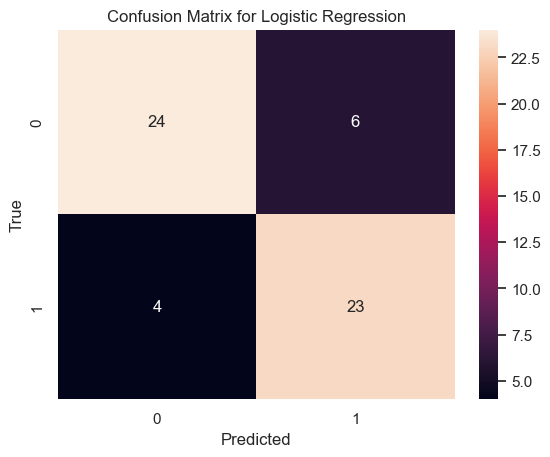

In [820]:
print('Logistic Regression classification_report')
print(classification_report(y_test, y_pred_lr))
cm_lr = confusion_matrix(y_test, y_pred_lr)
print(cm_lr)
sns.heatmap(cm_lr, annot=True)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Logistic Regression')

Decision Tree classification_report
              precision    recall  f1-score   support

           0       0.69      0.67      0.68        30
           1       0.64      0.67      0.65        27

    accuracy                           0.67        57
   macro avg       0.67      0.67      0.67        57
weighted avg       0.67      0.67      0.67        57



Text(0.5, 1.0, 'Confusion Matrix for Decision Tree')

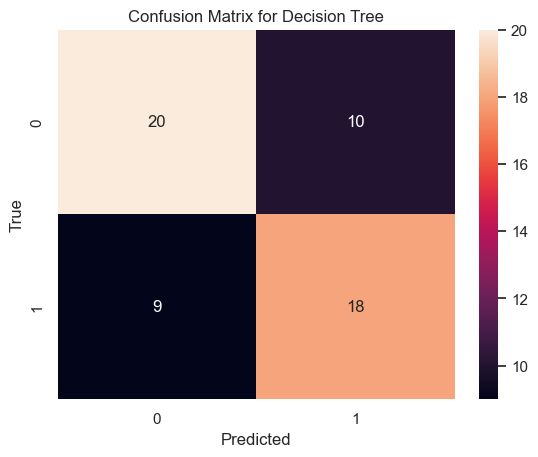

In [821]:
print('Decision Tree classification_report')
print(classification_report(y_test, y_pred_dt))
cm_dt = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(cm_dt, annot=True)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Decision Tree')

Random Forest classification_report
              precision    recall  f1-score   support

           0       0.77      0.80      0.79        30
           1       0.77      0.74      0.75        27

    accuracy                           0.77        57
   macro avg       0.77      0.77      0.77        57
weighted avg       0.77      0.77      0.77        57



Text(0.5, 1.0, 'Confusion Matrix for Random Forest')

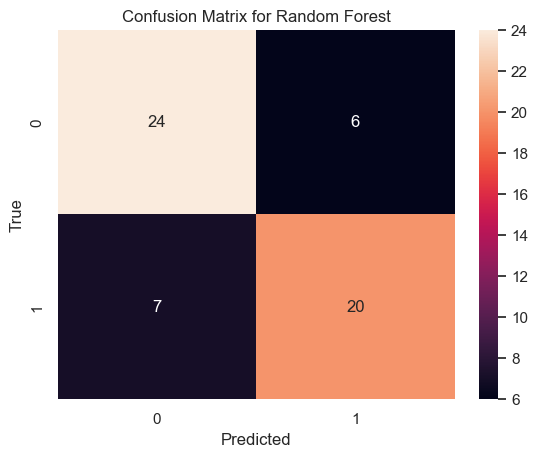

In [822]:
print('Random Forest classification_report')
print(classification_report(y_test, y_pred_rf))
cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Random Forest')

KNN classification_report
              precision    recall  f1-score   support

           0       0.83      0.80      0.81        30
           1       0.79      0.81      0.80        27

    accuracy                           0.81        57
   macro avg       0.81      0.81      0.81        57
weighted avg       0.81      0.81      0.81        57



Text(0.5, 1.0, 'Confusion Matrix for KNN')

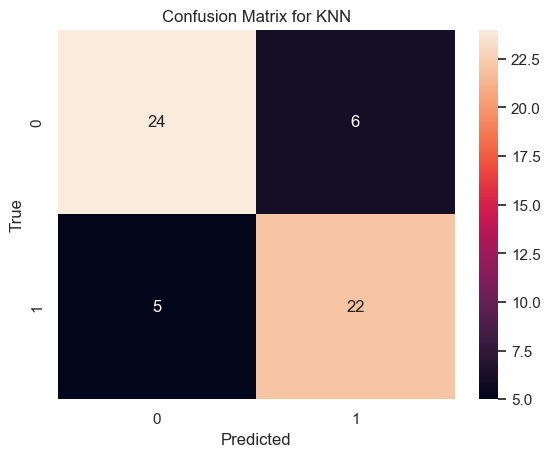

In [823]:
print('KNN classification_report')
print(classification_report(y_test, y_pred_knn))
cm_knn = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cm_knn, annot=True)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for KNN')

SVM classification_report
              precision    recall  f1-score   support

           0       0.86      0.80      0.83        30
           1       0.79      0.85      0.82        27

    accuracy                           0.82        57
   macro avg       0.83      0.83      0.82        57
weighted avg       0.83      0.82      0.82        57



Text(0.5, 1.0, 'Confusion Matrix for SVM')

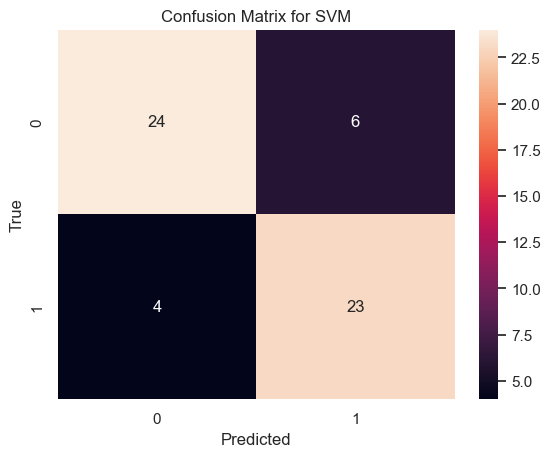

In [824]:
print('SVM classification_report')
print(classification_report(y_test, y_pred_svm))
cm_svm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(cm_svm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for SVM')

### 優化 Logostic Regression 準確度 (當前 82%)
五個模型比較下來 Logistic Regression 和 SVM 的準確度是比較高的 82%

Logistic Regression 和 SVM 得到相同的準確度與相同 confusion matrix 分布，可能原因:

    - 數據是線性可分的（可以用一條直線或平面輕鬆區分不同類別）在線性方法的模型，可能會出現類似結果。
    - 較小或簡單的數據集，模型容易學習數據中的關鍵特徵，導致預測上的表現相似。
    
因為數據集較小, 我使用 Logistic Regression 來進行進階延伸, tune 3 種方法來提升準確度 (SVM 適合更複雜或是高維度的數據集)

In [825]:
print("Accuracy of Logistic Regression:", round(accuracy_lr, 2))

Accuracy of Logistic Regression: 0.82


### 進階延伸: 3 種優化實驗, 測試準確度是否提升
1. 建立一個 納入 PCA (主成分分析) 的 Logistic Regression Model
2. 性別分群 (建立男女性別各自的 Logistic Regression Model)
3. K-means 分群 (建立 2 clusters 各自的 Logistic Regression Model)

### Tune 1 - 納入PCA

PCA 主成分分析, n_components 參數選擇與測試
- 設定為小數（Ex: 0.9）:保留原始數據 90% 方差的主成分數量
- 設定為整數: 指定降維後保留的主成分數量

In [826]:
Logistic_array=[]
test_PCA_n=[0.7,0.75,0.8,0.85,0.9,0.95,1,2,3,4,5,6]

for i in test_PCA_n:
    pca = PCA(n_components=i)
    X_train_pca = pca.fit_transform(X_train_normalized)
    X_test_pca = pca.transform(X_test_normalized)
    
    lr_model = LogisticRegression()
    lr_model.fit(X_train_pca, y_train)
    y_pred_lr = lr_model.predict(X_test_pca)
    accuracy_lr = round(accuracy_score(y_test, y_pred_lr), 2)
    
    #print('n_components=', i)
    #print("Accuracy of Logistic Regression:", accuracy_lr)
    #print('=========================')
    Logistic_array.append(accuracy_lr)

PCA_n_df = pd.DataFrame(index=test_PCA_n, data={'Accuracy of Logistic Regression': Logistic_array})
PCA_n_df

,Accuracy of Logistic Regression
0.70,0.75
0.75,0.75
0.80,0.74
0.85,0.75
0.90,0.77
0.95,0.82
1.00,0.84
2.00,0.82
3.00,0.77
4.00,0.77


Text(67.25, 0.5, 'PCA - Num of components')

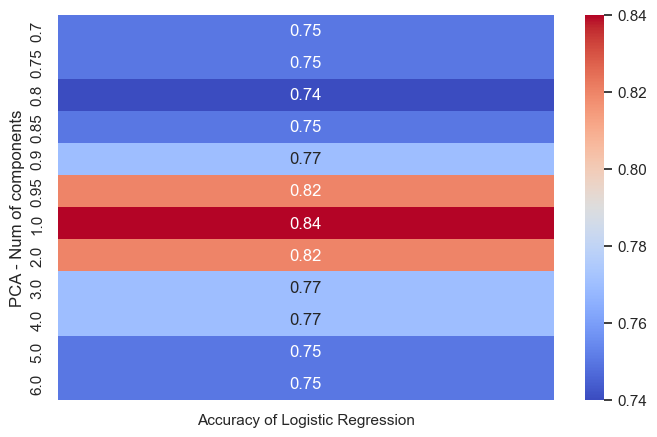

In [827]:
plt.figure(figsize=(8,5))
sns.heatmap(PCA_n_df,annot=True, cmap='coolwarm')
plt.ylabel('PCA - Num of components')

### 結果: PCA(n_components=1) tune 完之後的準確度為最高: 84%
- 相較於原 Logistic Regression Model 提升 2 % Accuracy

下方使用 PCA(n_components=1) -> 降維後保留 1 個主成分進行分析

In [828]:
pca = PCA(n_components=1)
X_train_pca = pca.fit_transform(X_train_normalized)
X_test_pca = pca.transform(X_test_normalized)

X_train_pca.shape

(227, 1)

In [829]:
lr_model = LogisticRegression()
lr_model.fit(X_train_pca, y_train)
y_pred_lr = lr_model.predict(X_test_pca)
accuracy_lr = round(accuracy_score(y_test, y_pred_lr), 2)
print("Accuracy of Logistic Regression after PCA:", accuracy_lr)

Accuracy of Logistic Regression after PCA: 0.84


### Tune 2 - 進行性別分群 (建立男女性別各自的 Logistic Regression Model)
- 從 EDA 探索性資料分析階段觀察到 男性占總數據集 68%
- 透過性別分群，探討男女各自建立 Logistic Regression Model，準確度是否會提升

In [830]:
heart_data.head()

,age,trtbps,chol,thalachh,oldpeak,output,sex_1,cp_1,cp_2,cp_3,...,exng_1,slp_1,slp_2,caa_1,caa_2,caa_3,caa_4,thall_1,thall_2,thall_3
0,63,145,233,150,2.30,1,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,37,130,250,187,3.50,1,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,41,130,204,172,1.40,1,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
3,56,120,236,178,0.80,1,1,1,0,0,...,0,0,1,0,0,0,0,0,1,0
4,57,120,354,163,0.60,1,0,0,0,0,...,1,0,1,0,0,0,0,0,1,0


- 將經過資料預處理的數據集，拆分為男性與女性各自的 dataframe

In [831]:
Male_heart_data = heart_data[heart_data['sex_1'] == 1]
Female_heart_data = heart_data[heart_data['sex_1'] == 0]

In [832]:
Male_heart_data.head()

,age,trtbps,chol,thalachh,oldpeak,output,sex_1,cp_1,cp_2,cp_3,...,exng_1,slp_1,slp_2,caa_1,caa_2,caa_3,caa_4,thall_1,thall_2,thall_3
0,63,145,233,150,2.30,1,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,37,130,250,187,3.50,1,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,56,120,236,178,0.80,1,1,1,0,0,...,0,0,1,0,0,0,0,0,1,0
5,57,140,192,148,0.40,1,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0
7,44,120,263,173,0.00,1,1,1,0,0,...,0,0,1,0,0,0,0,0,0,1


In [833]:
Female_heart_data.head()

,age,trtbps,chol,thalachh,oldpeak,output,sex_1,cp_1,cp_2,cp_3,...,exng_1,slp_1,slp_2,caa_1,caa_2,caa_3,caa_4,thall_1,thall_2,thall_3
2,41,130,204,172,1.40,1,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
4,57,120,354,163,0.60,1,0,0,0,0,...,1,0,1,0,0,0,0,0,1,0
6,56,140,294,153,1.30,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
11,48,130,275,139,0.20,1,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
14,58,150,283,162,1.00,1,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0


1. 建立男性的 Logistic Regression Model

In [834]:
Male_heart_data.shape

(199, 23)

In [835]:
#Train test split
X = Male_heart_data.drop('output', axis=1)
y = Male_heart_data['output']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [836]:
#Normalization
scaler = MinMaxScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

In [837]:
X_train_normalized.shape

(159, 22)

In [838]:
X_test_normalized.shape

(40, 22)

### 結果 1 : Male 不採納 PCA 結果，Accuracy: 85%

In [839]:
#Model training and evaluation
lr_model = LogisticRegression()
lr_model.fit(X_train_normalized, y_train)
y_pred_lr = lr_model.predict(X_test_normalized)
accuracy_lr = round(accuracy_score(y_test, y_pred_lr), 2)
print("Male - Accuracy of Logistic Regression without PCA:", accuracy_lr)

Male - Accuracy of Logistic Regression without PCA: 0.85


### 結果 2: Male 採納 PCA 結果，Accuracy: 75%

In [840]:
#PCA
pca = PCA(n_components=1)
X_train_pca = pca.fit_transform(X_train_normalized)
X_test_pca = pca.transform(X_test_normalized)

X_train_pca.shape

(159, 1)

In [841]:
#Model training and evaluation
lr_model = LogisticRegression()
lr_model.fit(X_train_pca, y_train)
y_pred_lr = lr_model.predict(X_test_pca)
accuracy_lr = round(accuracy_score(y_test, y_pred_lr), 2)
print("Male - Accuracy of Logistic Regression after PCA:", accuracy_lr)

Male - Accuracy of Logistic Regression after PCA: 0.75


2. 測試女性的 Logistic Regression Model

In [842]:
Female_heart_data.shape

(85, 23)

In [843]:
#Train test split
X = Female_heart_data.drop('output', axis=1)
y = Female_heart_data['output']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [844]:
#Normalization
scaler = MinMaxScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

In [845]:
X_train_normalized.shape

(68, 22)

In [846]:
X_test_normalized.shape

(17, 22)

### 結果 1 : Female 不採納 PCA 結果，Accuracy: 94%

In [847]:
#Model training and evaluation
lr_model = LogisticRegression()
lr_model.fit(X_train_normalized, y_train)
y_pred_lr = lr_model.predict(X_test_normalized)
accuracy_lr = round(accuracy_score(y_test, y_pred_lr), 2)
print("Female - Accuracy of Logistic Regression without PCA:", accuracy_lr)

Female - Accuracy of Logistic Regression without PCA: 0.94


### 結果 2: Female 採納 PCA 結果，Accuracy: 94%

In [848]:
#PCA
pca = PCA(n_components=1)
X_train_pca = pca.fit_transform(X_train_normalized)
X_test_pca = pca.transform(X_test_normalized)

X_train_pca.shape

(68, 1)

In [849]:
#Model training and evaluation
lr_model = LogisticRegression()
lr_model.fit(X_train_pca, y_train)
y_pred_lr = lr_model.predict(X_test_pca)
accuracy_lr = round(accuracy_score(y_test, y_pred_lr), 2)
print("Female - Accuracy of Logistic Regression after PCA:", accuracy_lr)

Female - Accuracy of Logistic Regression after PCA: 0.94


### Tune 3 - 進行 K-means 分群
- 使用 K-means 將數據分為 2 clusters (分群), 讓 K-means 判斷 身體素質類似的病患 分為同一個群體
- 訓練各別分群的 Logistic Regression Model，測試準確度是否會提升

In [850]:
heart_data.head()

,age,trtbps,chol,thalachh,oldpeak,output,sex_1,cp_1,cp_2,cp_3,...,exng_1,slp_1,slp_2,caa_1,caa_2,caa_3,caa_4,thall_1,thall_2,thall_3
0,63,145,233,150,2.30,1,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,37,130,250,187,3.50,1,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,41,130,204,172,1.40,1,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
3,56,120,236,178,0.80,1,1,1,0,0,...,0,0,1,0,0,0,0,0,1,0
4,57,120,354,163,0.60,1,0,0,0,0,...,1,0,1,0,0,0,0,0,1,0


- 進行 K-means 分群，並將結果 (labels) 作為新的特徵標籤加入數據集

In [851]:
X = heart_data.drop('output', axis=1)

kmeans = KMeans(n_clusters=2).fit(X)
heart_data['cluster'] = kmeans.labels_
heart_data.head()

C:\Users\Tiffany\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Tiffany\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


,age,trtbps,chol,thalachh,oldpeak,output,sex_1,cp_1,cp_2,cp_3,...,slp_1,slp_2,caa_1,caa_2,caa_3,caa_4,thall_1,thall_2,thall_3,cluster
0,63,145,233,150,2.30,1,1,0,0,1,...,0,0,0,0,0,0,1,0,0,0
1,37,130,250,187,3.50,1,1,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,41,130,204,172,1.40,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
3,56,120,236,178,0.80,1,1,1,0,0,...,0,1,0,0,0,0,0,1,0,0
4,57,120,354,163,0.60,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1


- 依照 cluster column 將數據集拆分為 2 個 dataframe 進行測試

In [852]:
cluster_0 = heart_data[heart_data['cluster'] ==0]
cluster_1 = heart_data[heart_data['cluster'] ==1]

In [853]:
cluster_0.head()

,age,trtbps,chol,thalachh,oldpeak,output,sex_1,cp_1,cp_2,cp_3,...,slp_1,slp_2,caa_1,caa_2,caa_3,caa_4,thall_1,thall_2,thall_3,cluster
0,63,145,233,150,2.30,1,1,0,0,1,...,0,0,0,0,0,0,1,0,0,0
1,37,130,250,187,3.50,1,1,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,41,130,204,172,1.40,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
3,56,120,236,178,0.80,1,1,1,0,0,...,0,1,0,0,0,0,0,1,0,0
5,57,140,192,148,0.40,1,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0


In [854]:
cluster_1.head()

,age,trtbps,chol,thalachh,oldpeak,output,sex_1,cp_1,cp_2,cp_3,...,slp_1,slp_2,caa_1,caa_2,caa_3,caa_4,thall_1,thall_2,thall_3,cluster
4,57,120,354,163,0.60,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1
6,56,140,294,153,1.30,1,0,1,0,0,...,1,0,0,0,0,0,0,1,0,1
7,44,120,263,173,0.00,1,1,1,0,0,...,0,1,0,0,0,0,0,0,1,1
11,48,130,275,139,0.20,1,0,0,1,0,...,0,1,0,0,0,0,0,1,0,1
12,49,130,266,171,0.60,1,1,1,0,0,...,0,1,0,0,0,0,0,1,0,1


1. 測試 cluster_0 的 Logistic Regression Model

In [855]:
cluster_0.shape

(165, 24)

In [856]:
#Train test split
X = cluster_0.drop('output', axis=1)
y = cluster_0['output']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [857]:
#Normalization
scaler = MinMaxScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

In [858]:
X_train_normalized.shape

(132, 23)

In [859]:
X_test_normalized.shape

(33, 23)

### 結果 1 : cluster_0 不採納 PCA 結果，Accuracy: 82%

In [860]:
#Model training and evaluation
lr_model = LogisticRegression()
lr_model.fit(X_train_normalized, y_train)
y_pred_lr = lr_model.predict(X_test_normalized)
accuracy_lr = round(accuracy_score(y_test, y_pred_lr), 2)
print("cluster_0 - Accuracy of Logistic Regression without PCA:", accuracy_lr)

cluster_0 - Accuracy of Logistic Regression without PCA: 0.82


### 結果 2 : cluster_0 採納 PCA 結果，Accuracy: 76%

In [861]:
#PCA
pca = PCA(n_components=1)
X_train_pca = pca.fit_transform(X_train_normalized)
X_test_pca = pca.transform(X_test_normalized)

X_train_pca.shape

(132, 1)

In [862]:
#Model training and evaluation
lr_model = LogisticRegression()
lr_model.fit(X_train_pca, y_train)
y_pred_lr = lr_model.predict(X_test_pca)
accuracy_lr = round(accuracy_score(y_test, y_pred_lr), 2)
print("cluster_0 - Accuracy of Logistic Regression after PCA:", accuracy_lr)

cluster_0 - Accuracy of Logistic Regression after PCA: 0.76


2. 測試 cluster_1 的 Logistic Regression Model

In [863]:
cluster_1.shape

(119, 24)

In [864]:
#Train test split
X = cluster_1.drop('output', axis=1)
y = cluster_1['output']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [865]:
#Normalization
scaler = MinMaxScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

In [866]:
X_train_normalized.shape

(95, 23)

In [867]:
X_test_normalized.shape

(24, 23)

### 結果 1 :cluster_1 不採納 PCA 結果，Accuracy: 92%

In [868]:
#Model training and evaluation
lr_model = LogisticRegression()
lr_model.fit(X_train_normalized, y_train)
y_pred_lr = lr_model.predict(X_test_normalized)
accuracy_lr = round(accuracy_score(y_test, y_pred_lr), 2)
print("cluster_1 - Accuracy of Logistic Regression without PCA:", accuracy_lr)

cluster_1 - Accuracy of Logistic Regression without PCA: 0.92


### 結果 2 : cluster_1 採納 PCA 結果，Accuracy: 96%

In [869]:
#PCA
pca = PCA(n_components=1)
X_train_pca = pca.fit_transform(X_train_normalized)
X_test_pca = pca.transform(X_test_normalized)

X_train_pca.shape

(95, 1)

In [870]:
#Model training and evaluation
lr_model = LogisticRegression()
lr_model.fit(X_train_pca, y_train)
y_pred_lr = lr_model.predict(X_test_pca)
accuracy_lr = round(accuracy_score(y_test, y_pred_lr), 2)
print("cluster_1 - Accuracy of Logistic Regression after PCA:", accuracy_lr)

cluster_1 - Accuracy of Logistic Regression after PCA: 0.96


### Summary

### 原始 Logistic Regression 模型 (82%)

### Tune 1 - 納入PCA
- Accuracy of Logistic Regression after PCA: 84%

### Tune 2 - 進行性別分群 (建立男女性別各自的 Logistic Regression Model)
不採納 PCA 結果:
- Male Accuracy: 85%
- Female: Accuracy: 94%

採納 PCA 結果:
- Male Accuracy: 75%
- Female Accuracy: 94%

### Tune 3 - 進行 K-means 分群 (建立 2 clusters 各自的 Logistic Regression Model)
不採納 PCA 結果:
- cluster_0 - Accuracy: 82%
- cluster_1 - Accuracy: 92%

採納 PCA 結果:
- cluster_0 - Accuracy: 76%
- cluster_1 - Accuracy: 96%

### 使用 "PCA" 後的模型預測, 精準度從 82% 提升至 84%
### 使用 "性別分群" 後的模型預測,對於 "女性" 有較顯著的提升, 精準度為94%
### 使用 "K-means分群" 後的模型預測, 搭配使用 PCA的cluster_1 精準度可達到96%

備註: 由於原始資料集本身樣本不多(300多筆),在預測準確度上會根據資料數量有較大幅度的變化,
此處的採用男女或K-means分群後再各自進行模型預測,對於某些分群結果有較大的精準度提升.